<a href="https://colab.research.google.com/github/SashaK2609/facebook-ads-analisys/blob/main/Facebook_ads_metrics_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/facebook_ads_data (2.0).csv'
facebook_df = pd.read_csv(file_path)
facebook_df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [ ]:
#new dataframe for the year 2021 only
import datetime as dt
facebook_df['ad_date'] = pd.to_datetime(facebook_df['ad_date'])
include = facebook_df[facebook_df['ad_date'].dt.year == 2021]
include


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
274,2021-12-31,Lookalike,143.19,24699,194,138.86,0.74,5.80,0.007855,0.969760
275,2021-12-31,Trendy,8.82,25345,63,16.32,0.14,0.35,0.002486,1.850340
276,2021-12-31,Wholesale,21.37,6705,24,27.93,0.89,3.19,0.003579,1.306972
277,2021-12-30,Lookalike,227.56,44527,897,243.02,0.25,5.11,0.020145,1.067938
278,2021-12-30,Trendy,31.92,8833,58,63.67,0.55,3.61,0.006566,1.994674
...,...,...,...,...,...,...,...,...,...,...
1436,2021-01-05,Discounts,81.15,60232,1379,61.68,0.06,1.35,0.022895,0.760074
1437,2021-01-04,Discounts,70.06,22440,1256,68.47,0.06,3.12,0.055971,0.977305
1438,2021-01-02,Discounts,7.74,10709,205,6.90,0.04,0.72,0.019143,0.891473
1439,2021-01-01,Brand,0.39,353,0,0.59,NaN,1.10,0.000000,1.512821


In [ ]:
#daily spent on advertisement
spend_2021 = include.groupby('ad_date', as_index = False)['total_spend'].sum()
spend_2021

,ad_date,total_spend
0,2021-01-01,0.39
1,2021-01-02,7.74
2,2021-01-04,70.06
3,2021-01-05,81.15
4,2021-01-06,142.77
...,...,...
324,2021-12-27,478.31
325,2021-12-28,359.83
326,2021-12-29,163.25
327,2021-12-30,285.67


In [ ]:
import matplotlib.pyplot as plt

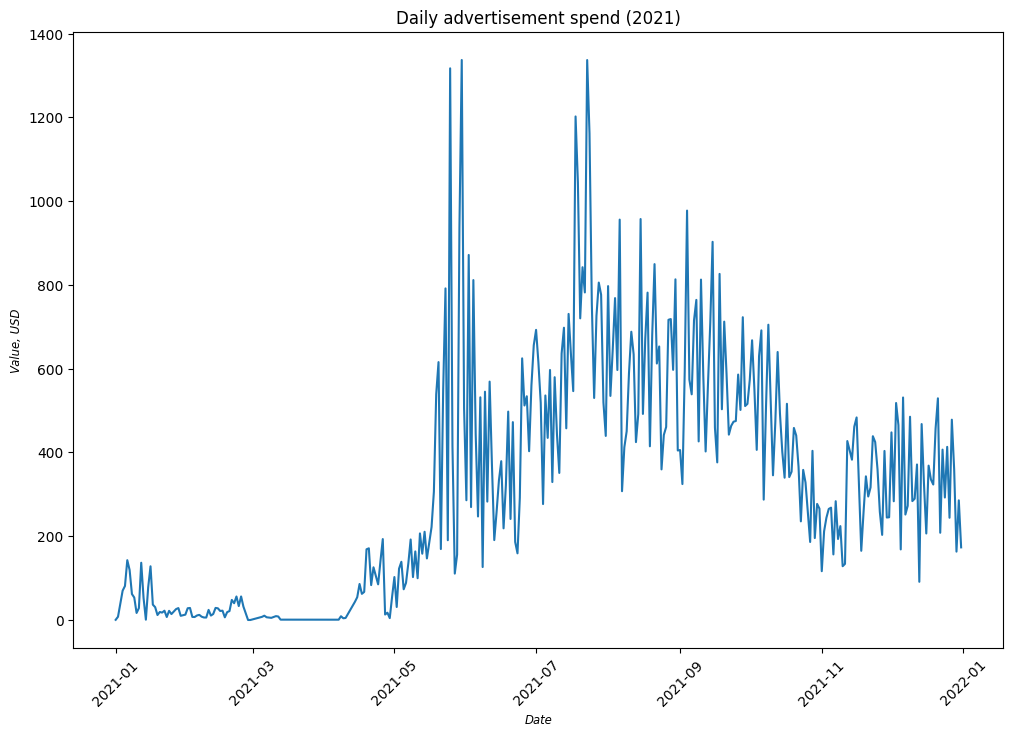

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(spend_2021['ad_date'], spend_2021['total_spend'])
plt.title('Daily advertisement spend (2021)', fontsize = 'large', loc = 'center')
plt.xlabel('Date', fontsize = 'small', fontstyle = 'italic')
plt.ylabel('Value, USD', fontsize = 'small', fontstyle = 'italic')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
include['rolling_romi'] = include.romi.rolling(10).mean()
print(include['rolling_romi'])

274          NaN
275          NaN
276          NaN
277          NaN
278          NaN
          ...   
1436    1.153403
1437    1.137149
1438    1.131892
1439    1.206836
1440         NaN
Name: rolling_romi, Length: 1167, dtype: float64


<ipython-input-7-762dbc1a2809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include['rolling_romi'] = include.romi.rolling(10).mean()


In [ ]:
include['rolling_spend'] = include['total_spend'].rolling(10).mean()
print(include['rolling_spend'])

274        NaN
275        NaN
276        NaN
277        NaN
278        NaN
         ...  
1436    50.420
1437    54.580
1438    53.674
1439    48.350
1440    48.254
Name: rolling_spend, Length: 1167, dtype: float64


<ipython-input-8-f91f3cb40434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include['rolling_spend'] = include['total_spend'].rolling(10).mean()


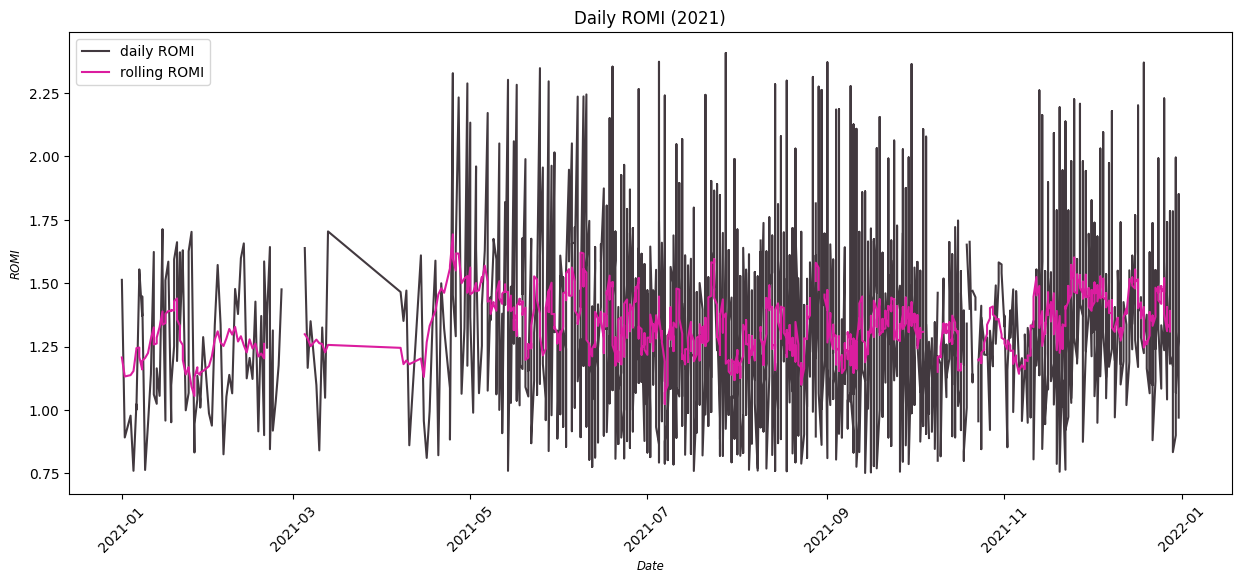

In [ ]:
#daily ROMI for 2021
plt.figure(figsize = (15,6))
plt.plot(include['ad_date'], include['romi'], color = '#42393f', label = 'daily ROMI')

plt.plot(include['ad_date'], include['rolling_romi'], color = '#db1d9f', label = 'rolling ROMI')

plt.title('Daily ROMI (2021)', fontsize = 'large', loc = 'center')
plt.xlabel('Date', fontsize = 'small', fontstyle = 'italic')
plt.ylabel('ROMI', fontsize = 'small', fontstyle = 'italic')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

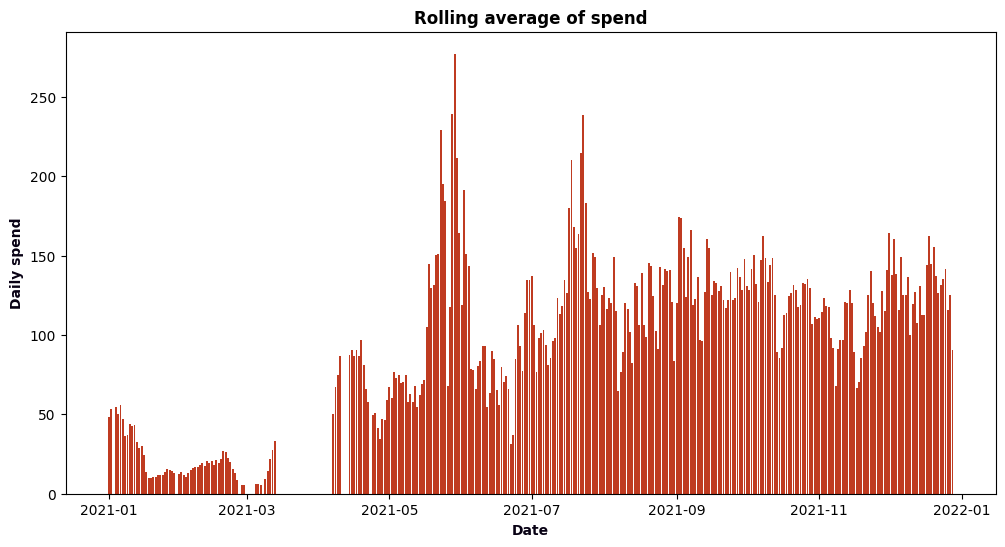

In [ ]:
# rolling average
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.bar(include['ad_date'], include['rolling_spend'], color = '#bf3b21', label = 'rolling spend')
ax1.set_xlabel('Date', color='#080114', fontweight = 'bold')
ax1.set_ylabel('Daily spend', color='#080114', fontweight = 'bold')

plt.title('Rolling average of spend', fontweight = 'bold')

plt.show()

In [ ]:
#total spend on each campaign
campaign_costs = facebook_df.groupby('campaign_name', as_index = False)['total_spend'].sum()
campaign_costs


,campaign_name,total_spend
0,Brand,539.92
1,Crazy discounts,2175.29
2,Discounts,2856.39
3,Electronics,23920.42
4,Expansion,67212.82
5,Hobbies,11326.97
6,Lookalike,63631.09
7,New items,2936.97
8,Promos,4993.84
9,Trendy,1992.31


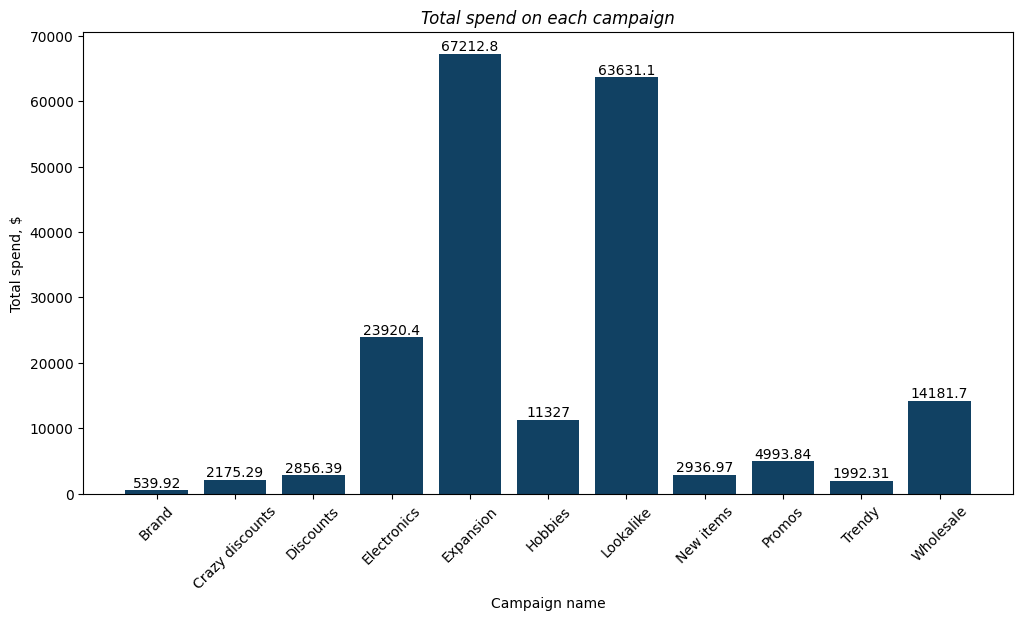

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

bar_container = ax.bar(campaign_costs['campaign_name'], campaign_costs['total_spend'], color = '#114163', width = 0.8)
ax.set_title('Total spend on each campaign', fontsize = 'large', loc = 'center', fontstyle = 'oblique')
ax.set_ylabel('Total spend, $')
ax.set_xlabel('Campaign name')
ax.bar_label(bar_container, label_type='edge')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#total ROMI in each campaign
campaign_romi = round(facebook_df.groupby('campaign_name', as_index = False)['romi'].sum(), 1)
print(campaign_romi)

      campaign_name   romi
0             Brand  124.1
1   Crazy discounts  149.9
2         Discounts  121.0
3       Electronics  208.3
4         Expansion  141.1
5           Hobbies  121.4
6         Lookalike  288.9
7         New items  124.1
8            Promos  248.8
9            Trendy  167.5
10        Wholesale  244.1


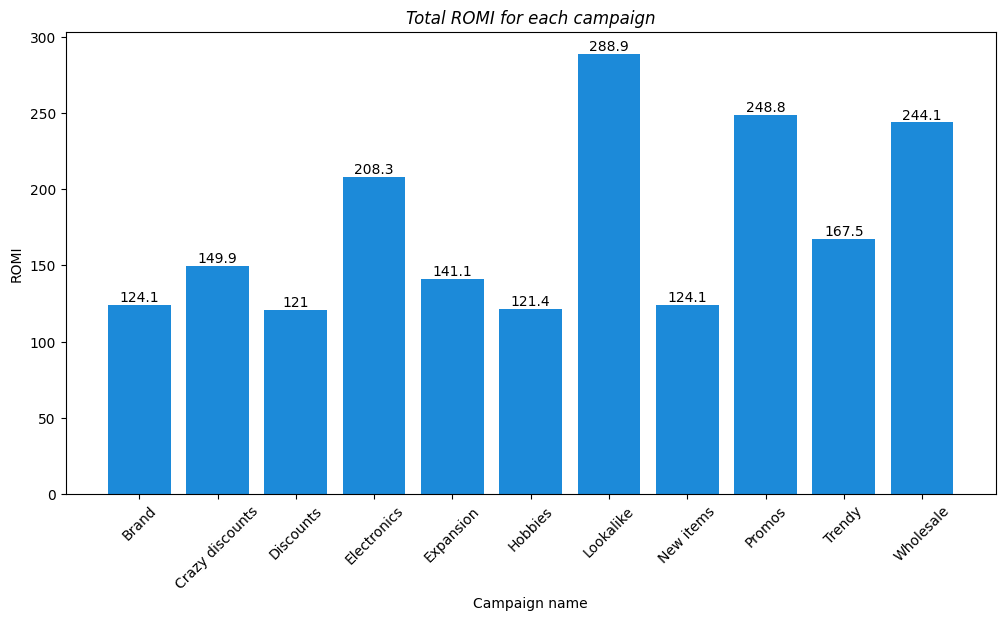

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

bar_container = ax.bar(campaign_romi['campaign_name'], campaign_romi['romi'], color = '#1c8ad9', width = 0.8)
ax.set_title('Total ROMI for each campaign', fontsize = 'large', loc = 'center', fontstyle = 'italic')
ax.set_ylabel('ROMI')
ax.set_xlabel('Campaign name')
ax.bar_label(bar_container, label_type='edge')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# розкид щоденного ROMI за кампанією
import seaborn as sns

In [ ]:
campaign_daily_romi = round(facebook_df.groupby(['ad_date', 'campaign_name'], as_index = False)['romi'].sum(), 2)
print(campaign_daily_romi)

        ad_date campaign_name  romi
0    2020-11-11     Discounts  1.26
1    2020-11-12     Discounts  0.92
2    2020-11-13     Discounts  1.54
3    2020-11-14     Discounts  1.74
4    2020-11-15     Discounts  1.57
...         ...           ...   ...
1489 2022-10-29     Expansion  0.95
1490 2022-10-30     Expansion  1.41
1491 2022-10-31     Expansion  0.84
1492 2022-11-01     Expansion  0.00
1493 2022-11-05     Expansion  0.00

[1494 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


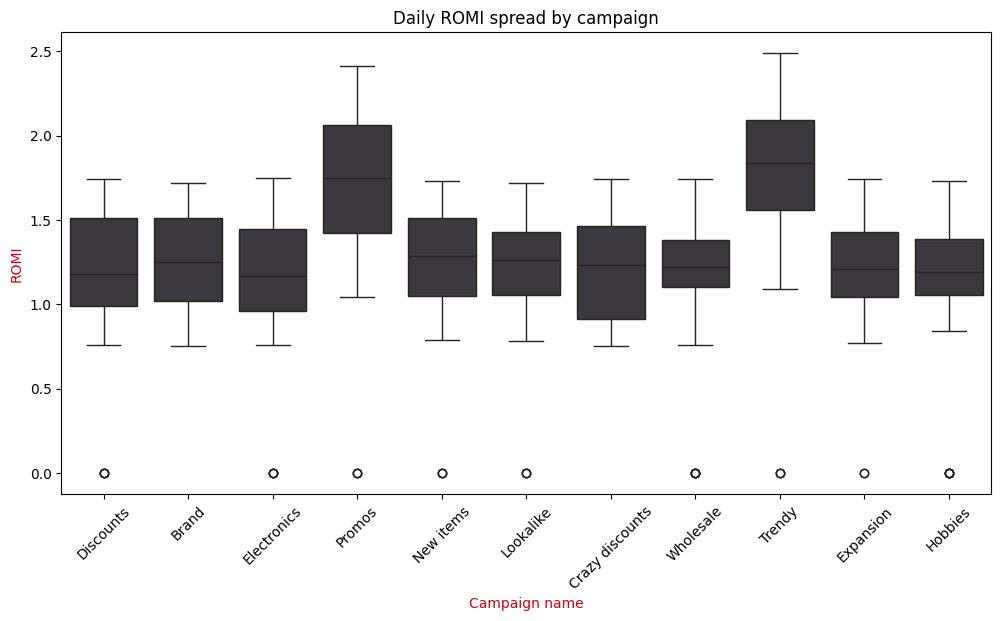

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = campaign_daily_romi, x = 'campaign_name', y = 'romi', color = '#3d3640')
plt.title('Daily ROMI spread by campaign')
plt.xlabel('Campaign name', color = '#bf0612')
plt.ylabel('ROMI', color = '#bf0612')
plt.xticks(rotation = 45)
plt.show()

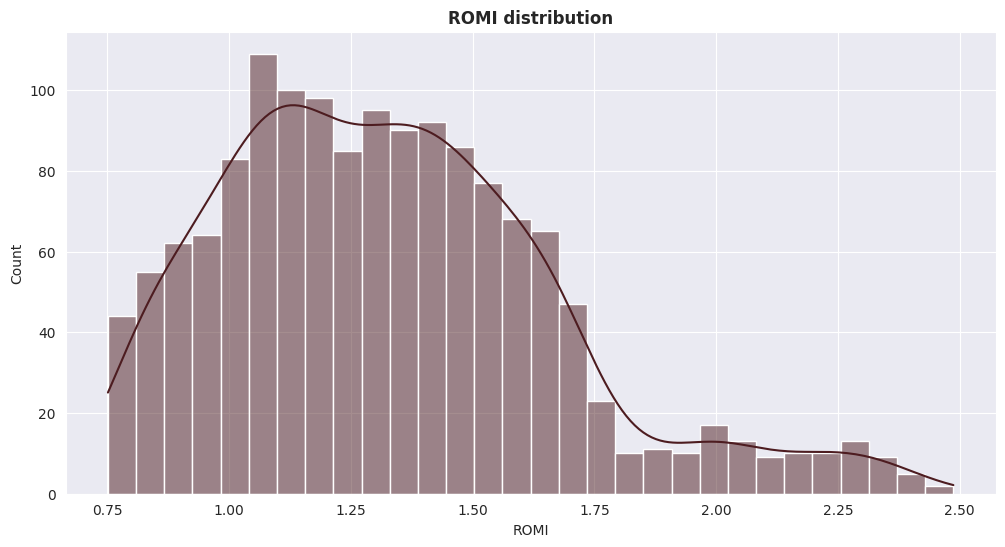

In [ ]:
#ROMI histogram
sns.set_style('darkgrid')
plt.figure(figsize = (12, 6))
sns.histplot(data = facebook_df, x = 'romi', bins = 30, kde = True, color = '#4d1c20')
plt.title('ROMI distribution', fontweight = 'bold')
plt.xlabel('ROMI')
plt.show()

In [ ]:
numeric_fb_df = facebook_df.loc[:, ~facebook_df.columns.isin(['ad_date', 'campaign_name'])]
numeric_fb_df = numeric_fb_df.corr()

In [ ]:
labels = ['Total spend', 'Total impressions', 'Total clicks', 'Total value', 'CPC', 'CPM', 'CTR', 'ROMI']

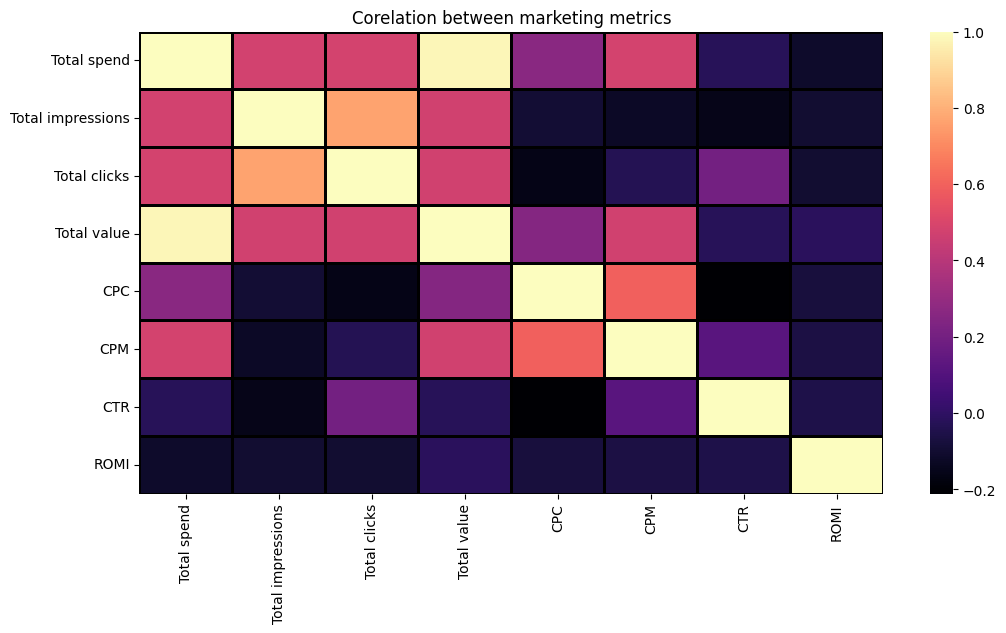

In [ ]:
#heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_fb_df,
            cmap = 'magma',
            linewidth = 1,
            linecolor = 'black',
            xticklabels = labels,
            yticklabels = labels)
plt.title('Correlation between marketing metrics')
plt.show()

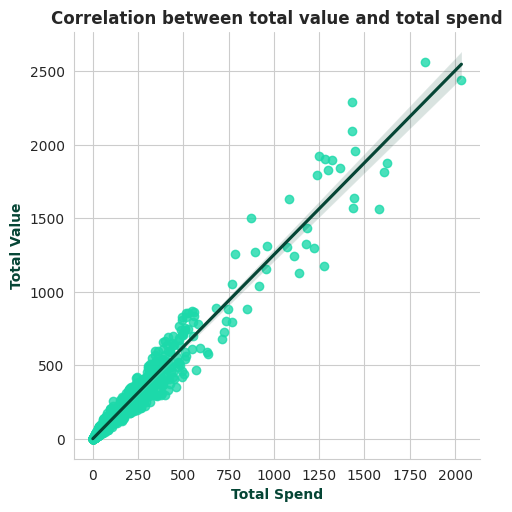

In [ ]:
#точкова діаграма з лінійною регресією
sns.set_style('whitegrid')
sns.lmplot(data = facebook_df, x = 'total_spend', y = 'total_value', scatter_kws = {'color':'#1cd9aa'}, line_kws = {'color':'#054535'})
plt.title('Correlation between total value and total spend', fontweight = 'bold')
plt.xlabel('Total Spend', fontweight = "bold", color = '#054535')
plt.ylabel('Total Value', fontweight = "bold", color = '#054535')
plt.show()